Delieverable 2 Remade

Load nesessary data and import the libraries that I need

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data
data = pd.read_csv('ACSST5Y2021.S2201-Data.csv')


Number of food stamp recipents by race in Cencus Tracts 64 and 105

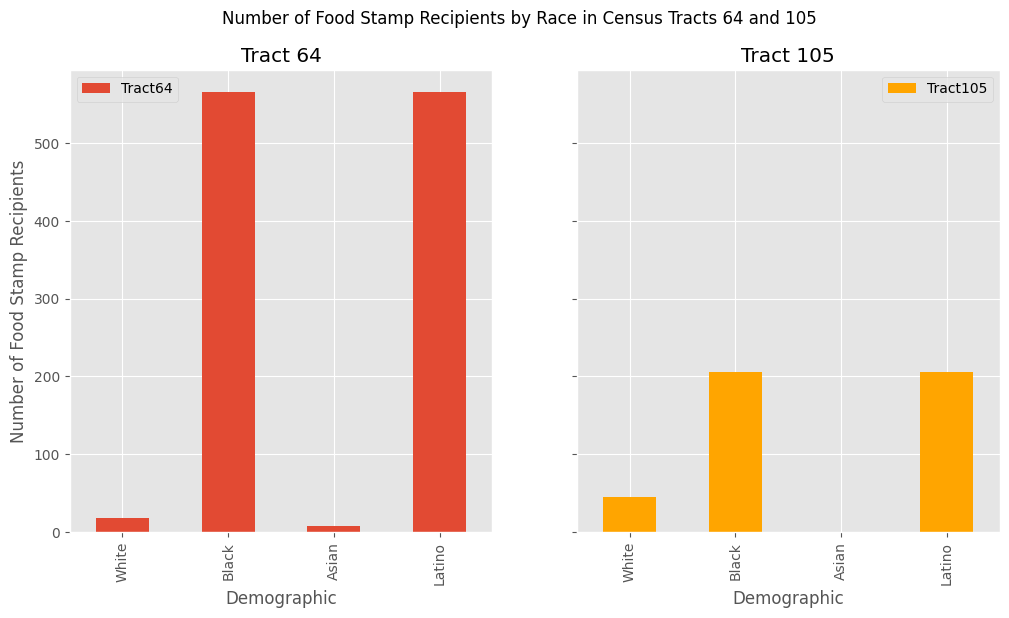

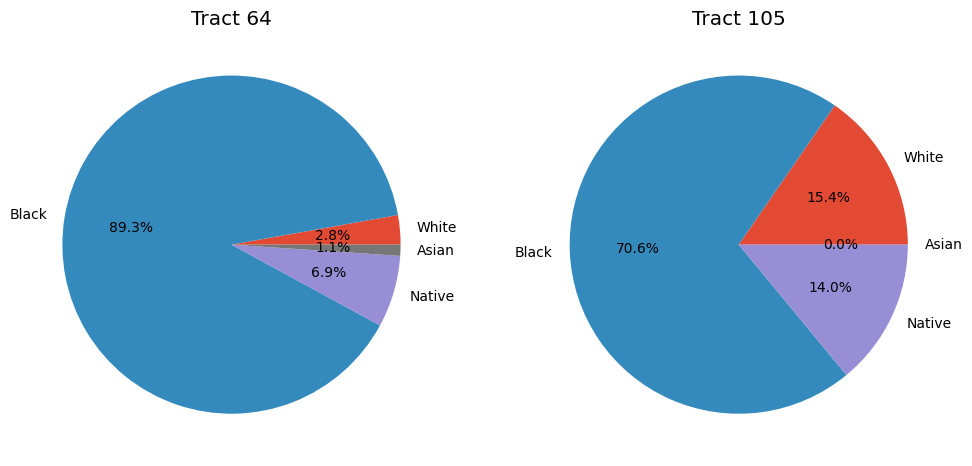

In [68]:
data = pd.read_csv('ACSST5Y2021.S2201-Data.csv')
# Convert relevant columns to numeric data type
numeric_columns = ['S2201_C01_001E', 'S2201_C03_026E', 'S2201_C03_033E', 'S2201_C03_028E']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Extract relevant columns for tract 64
white_64 = data.loc[1, 'S2201_C03_033E']
black_64 = data.loc[1, 'S2201_C03_026E']
asian_64 = data.loc[1, 'S2201_C03_028E']
latino_64 = data.loc[1, 'S2201_C03_026E']

# Extract relevant columns for tract 105
white_105 = data.loc[2, 'S2201_C03_033E']
black_105 = data.loc[2, 'S2201_C03_026E']
asian_105 = data.loc[2, 'S2201_C03_028E']
latino_105 = data.loc[2, 'S2201_C03_026E']

# Store the total number of food stamp recipients in each demographic group
data_processed = pd.DataFrame({
    "Demographic": ["White", "Black", "Asian", "Latino"],
    "Tract64": [white_64, black_64, asian_64, latino_64],
    "Tract105": [white_105, black_105, asian_105, latino_105]
})

# Visualize the results using bar plots
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

data_processed.plot.bar(x="Demographic", y="Tract64", ax=ax[0])
data_processed.plot.bar(x="Demographic", y="Tract105", ax=ax[1], color="orange")

ax[0].set_title("Tract 64")
ax[1].set_title("Tract 105")

ax[0].set_ylabel("Number of Food Stamp Recipients")
ax[1].set_ylabel("Number of Food Stamp Recipients")

plt.suptitle("Number of Food Stamp Recipients by Race in Census Tracts 64 and 105")
plt.show()



#The percentage for each race receving food stamp in tract 64 and 105
# Extract data for each race in Tract 64 and Tract 105
white_64 = data.loc[1, 'S2201_C04_025E']
black_64 = data.loc[1, 'S2201_C04_026E']
native_64 = data.loc[1, 'S2201_C04_027M']
asian_64 = data.loc[1, 'S2201_C04_028E']

white_105 = data.loc[2, 'S2201_C04_025E']
black_105 = data.loc[2, 'S2201_C04_026E']
native_105 = data.loc[2, 'S2201_C04_027M']
asian_105 = data.loc[2, 'S2201_C04_028E']

# Plot pie charts for Tract 64 and Tract 105
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie([white_64, black_64, native_64, asian_64], labels=["White", "Black", "Native", "Asian"], autopct='%1.1f%%')
ax1.set_title("Tract 64")

ax2.pie([white_105, black_105, native_105, asian_105], labels=["White", "Black", "Native", "Asian"], autopct='%1.1f%%')
ax2.set_title("Tract 105")

plt.show()


For all the tract 64, 102, 105, 110, the changes in each year and the demogrphic breakdown

/var/folders/_0/62j9c1s53kb6h59h2bd0mtx40000gn/T/ipykernel_5740/3619305462.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Year'] = year
/var/folders/_0/62j9c1s53kb6h59h2bd0mtx40000gn/T/ipykernel_5740/3619305462.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Year'] = year
/var/folders/_0/62j9c1s53kb6h59h2bd0mtx40000gn/T/ipykernel_5740/3619305462.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

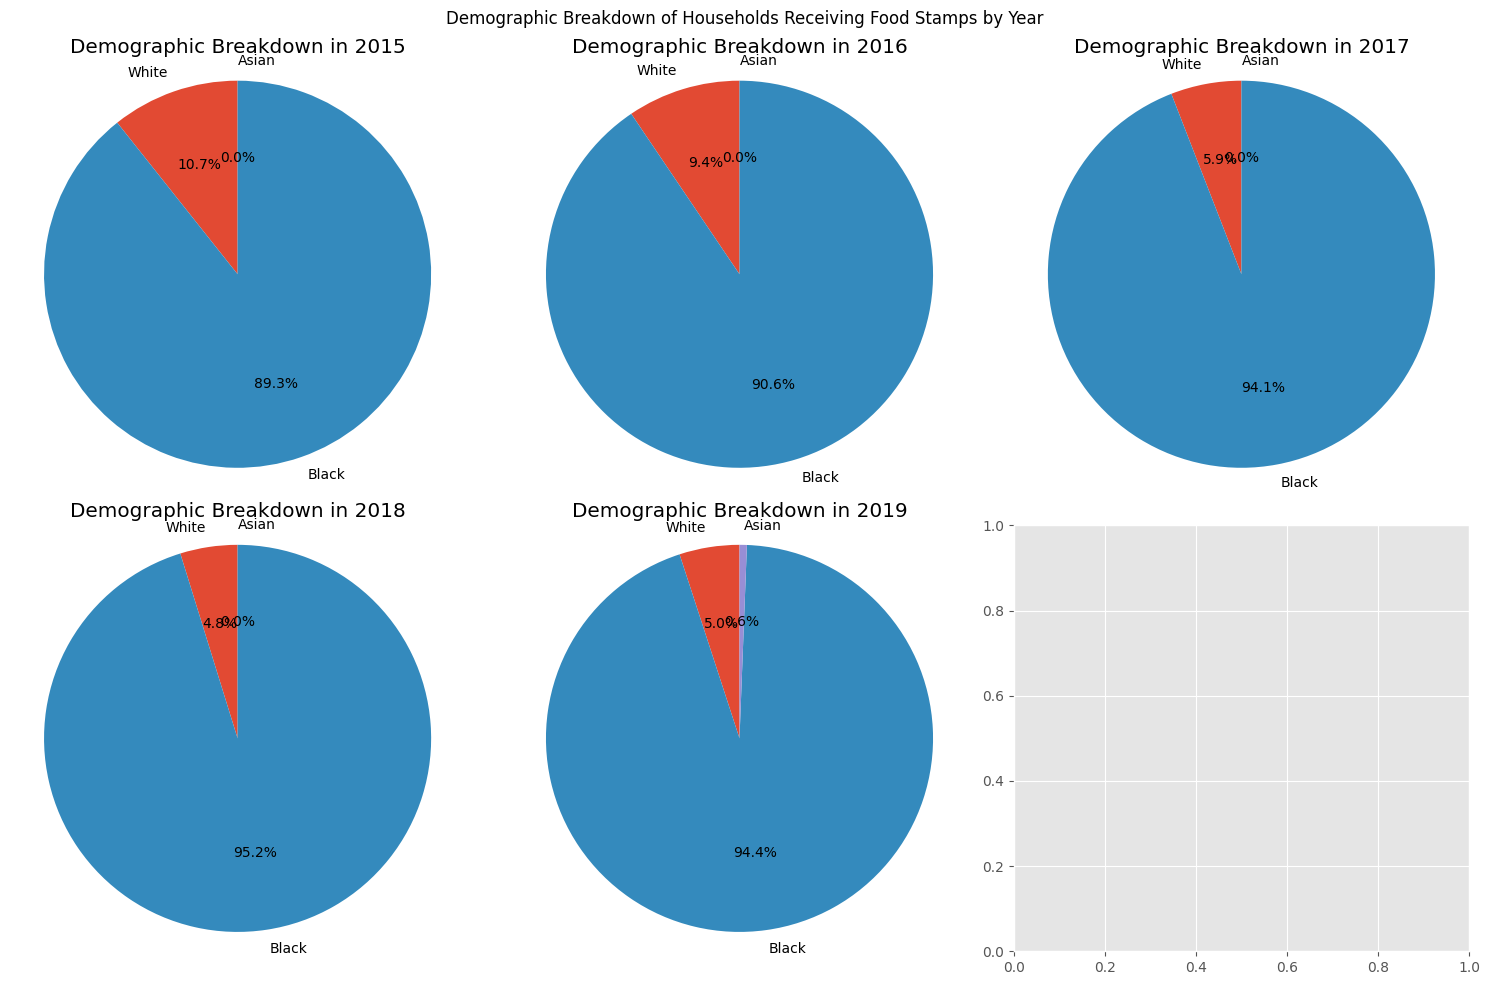

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Read local data files into DataFrames
file_prefix = "ACSST5Y"
file_suffix = ".S2201-Data.csv"
years = list(range(2015, 2020))
data_files = {year: pd.read_csv(f"{file_prefix}{year}{file_suffix}") for year in years}

# Define the column codes
total_column = 'S2201_C01_001E'
white_column = 'S2201_C03_025E'
black_column = 'S2201_C03_026E'
asian_column = 'S2201_C03_028E'

# Convert data to numeric
for year, data in data_files.items():
    data[total_column] = pd.to_numeric(data[total_column], errors='coerce')
    data[white_column] = pd.to_numeric(data[white_column], errors='coerce')
    data[black_column] = pd.to_numeric(data[black_column], errors='coerce')

    data[asian_column] = pd.to_numeric(data[asian_column], errors='coerce')


# Extract relevant information and store it in a list of DataFrames
data_frames = []
for year, data in data_files.items():
    data_filtered = data[[total_column, white_column, black_column, asian_column]]
    data_filtered['Year'] = year
    data_frames.append(data_filtered)

# Merge data from different years into a single DataFrame
merged_data = pd.concat(data_frames, ignore_index=True)

# Plot bar chart for total number of households receiving food stamps
'''fig, ax = plt.subplots()
merged_data.groupby('Year')[total_column].sum().plot(kind='bar', ax=ax)
ax.set_ylabel('Total Households Receiving Food Stamps')
plt.show()'''

# Plot pie charts for the demographic breakdown
demographics = ['White', 'Black', 'Asian']
columns = [white_column, black_column, asian_column]

fig2, axs2 = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i, year in enumerate(years):
    year_data = merged_data[merged_data['Year'] == year]
    total_demographics = [year_data[column].sum() for column in columns]
    row = i // 3
    col = i % 3
    axs2[row, col].pie(total_demographics, labels=demographics, autopct='%1.1f%%', startangle=90)
    axs2[row, col].set_title(f'Demographic Breakdown in {year}')
    axs2[row, col].axis('equal')

fig2.suptitle("Demographic Breakdown of Households Receiving Food Stamps by Year")
plt.tight_layout()

plt.show()

Over the entire time range from 2015 to 2019, the Black population consistently had the highest percentage of households receiving food stamps/SNAP benefits. In contrast, the Asian population had the lowest percentage of households receiving these benefits. This highlights a disparity in the usage of food stamps/SNAP benefits among different racial groups.


Percentage of Households Receiving Food Stamps/SNAP by Census Tract

  Tract  Percentage receiving food stamps/SNAP
0    64                              46.474602
1   102                               8.108108
2   105                              10.449625
3   110                               2.917981


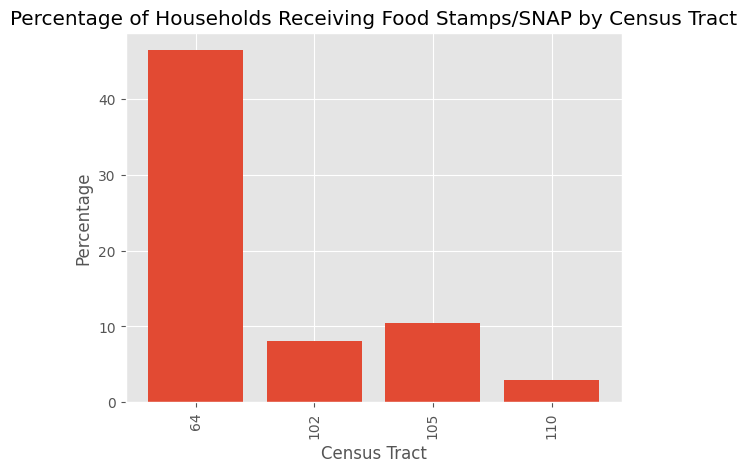

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv("https://raw.githubusercontent.com/EzioA666/demo-repo2/main/ACSST5Y2021.S2201-2023-03-27T003130.csv")

# Extract tract information from the 'Label (Grouping)' column
data['Tract'] = data['Label (Grouping)'].str.extract(r'Census Tract (\d+\.\d+)').astype(float)

# Create a DataFrame for the results
result = pd.DataFrame()

# Combine the data for each tract
tracts = ['64', '102', '105', '110']
tract_columns = [
    'Census Tract 64, District of Columbia, District of Columbia',
    ['Census Tract 102.01, District of Columbia, District of Columbia',
     'Census Tract 102.02, District of Columbia, District of Columbia'],
    'Census Tract 105, District of Columbia, District of Columbia',
    ['Census Tract 110.01, District of Columbia, District of Columbia',
     'Census Tract 110.02, District of Columbia, District of Columbia']
]

result['Tract'] = tracts

for i in range(len(tract_columns)):
    if type(tract_columns[i]) == list:
        households_receiving_snap = 0
        households_not_receiving_snap = 0
        for tract in tract_columns[i]:
            tract_data = data.filter(regex=f"{tract}.*")
            households_receiving_snap += int(tract_data.filter(regex=".*Households receiving food stamps/SNAP!!Estimate").sum(axis=1).values[0])
            households_not_receiving_snap += int(tract_data.filter(regex=".*Households not receiving food stamps/SNAP!!Estimate").sum(axis=1).values[0].replace(",", ""))
    else:
        tract_data = data.filter(regex=f"{tract_columns[i]}.*")
        households_receiving_snap = int(tract_data.filter(regex=".*Households receiving food stamps/SNAP!!Estimate").sum(axis=1).values[0])
        households_not_receiving_snap = int(tract_data.filter(regex=".*Households not receiving food stamps/SNAP!!Estimate").sum(axis=1).values[0].replace(",", ""))
    
    result.loc[i, 'Households receiving food stamps/SNAP'] = households_receiving_snap
    result.loc[i, 'Households not receiving food stamps/SNAP'] = households_not_receiving_snap
    result.loc[i, 'Percentage receiving food stamps/SNAP'] = (households_receiving_snap / (households_receiving_snap + households_not_receiving_snap)) * 100

# Print the result
print(result[['Tract', 'Percentage receiving food stamps/SNAP']])

# Set the plot style
plt.style.use('ggplot')

# Plot the percentage of households receiving food stamps/SNAP for each tract
plt.bar(result['Tract'], result['Percentage receiving food stamps/SNAP'])

# Set the plot title and axis labels
plt.title("Percentage of Households Receiving Food Stamps/SNAP by Census Tract")
plt.xlabel("Census Tract")
plt.ylabel("Percentage")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


Insights: 

1. Census Tract 64 has the highest percentage of households receiving food stamps/SNAP benefits, which is significantly higher than the other tracts. This suggests that the residents of Tract 64 may be experiencing more financial difficulties or have lower incomes compared to the other tracts.

2. Census Tract 105 has the second-highest percentage of households receiving food stamps/SNAP benefits, but the percentage is much lower than Tract 64. It still indicates that there might be some financial challenges faced by the residents of Tract 105, although to a lesser extent than Tract 64.

3. Census Tracts 102 and 110 have the lowest percentage of households receiving food stamps/SNAP benefits. This suggests that these tracts may have a higher average income or a lower percentage of residents facing financial difficulties compared to the other tracts. It is worth noting that Tract 110 has a slightly lower percentage than Tract 102, which might indicate better economic conditions in Tract 110.

